# Evaluate correlation

## 1. Mortality rate

### Import data

In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('datasets/Consolidado_TM.csv', sep=';', decimal=",")
df.head()

### Data normalization: simple feature scaling

In [78]:
df["tm_normalized"]= df["TM Ambos Sexos"]/df["TM Ambos Sexos"].max()
df.head()

,Departamento,Categoria,Cod_ Dpto,Grupo de edad,Población Ambos Sexos 2018,Defunciones Ambos Sexos 2018,TM Ambos Sexos,tm_normalized
0,Quindío,Urbana,63,20-49,229.910,271,0.001179,1.000000
1,Risaralda,Urbana,66,20-49,405.408,463,0.001142,0.968896
2,Valle del Cauca,Urbana,76,20-49,1.868.737,2.086,0.001116,0.947010
3,Atlántico,Urbana,8,20-49,1.100.761,1.184,0.001076,0.912531
4,Magdalena,Urbana,47,20-49,553.066,569,0.001029,0.872818


In [136]:
import matplotlib.pyplot as plt

In [ ]:
ax = df.plot.bar(x='Departamento', y='tm_normalized', rot=90, facecolor='#9999ff')

## 2. Model results

In [168]:
mr = pd.read_csv('datasets/Model_result_departament.csv').sort_values('vmd')

In [169]:
mr["vmd_normalized"]= mr["vmd"]/mr["vmd"].max()

In [186]:
mr = mr.drop(mr[mr.Location_clean == 'No aplica'].index)

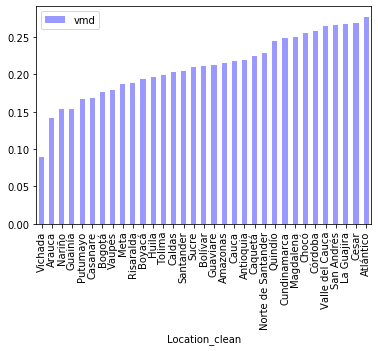

In [187]:
ax = mr.plot.bar(x='Location_clean', y='vmd', rot=90, facecolor='#9999ff'); ax.figure.savefig('model_value.png', dpi=300, bbox_inches='tight')

## 3. Merge dataframes

In [171]:
merge = pd.merge(df, mr, left_on='Departamento', right_on='Location_clean'); len(merge) # se omite Guanía y Vaupés por su mortalidad atípica

31

In [172]:
merge.head()

,Departamento,Categoria,Cod_ Dpto,Grupo de edad,Población Ambos Sexos 2018,Defunciones Ambos Sexos 2018,TM Ambos Sexos,tm_normalized,Location_clean,healthy_tweets,Total_tweets,vmd,vmd_normalized
0,Quindío,Urbana,63,20-49,229.910,271,0.001179,1.000000,Quindío,82.0,336.0,0.244048,0.880952
1,Risaralda,Urbana,66,20-49,405.408,463,0.001142,0.968896,Risaralda,79.0,420.0,0.188095,0.678978
2,Valle del Cauca,Urbana,76,20-49,1.868.737,2.086,0.001116,0.947010,Valle del Cauca,167.0,631.0,0.264659,0.955355
3,Atlántico,Urbana,8,20-49,1.100.761,1.184,0.001076,0.912531,Atlántico,123.0,444.0,0.277027,1.000000
4,Magdalena,Urbana,47,20-49,553.066,569,0.001029,0.872818,Magdalena,108.0,432.0,0.250000,0.902439


### Pearson Correlation

In [173]:
merge[["Departamento","tm_normalized","vmd_normalized"]].corr()

,tm_normalized,vmd_normalized
tm_normalized,1.00000,0.27212
vmd_normalized,0.27212,1.00000


In [175]:
urban=merge[merge.Categoria == 'Urbana']; urban[["tm_normalized","vmd_normalized"]].corr()

,tm_normalized,vmd_normalized
tm_normalized,1.000000,0.556323
vmd_normalized,0.556323,1.000000


In [177]:
rural=merge[merge.Categoria == 'Rural']; rural[["tm_normalized","vmd_normalized"]].corr()

,tm_normalized,vmd_normalized
tm_normalized,1.000000,0.735476
vmd_normalized,0.735476,1.000000


In [178]:
intermedia=merge[merge.Categoria == 'Intermedia']; intermedia[["tm_normalized","vmd_normalized"]].corr()

,tm_normalized,vmd_normalized
tm_normalized,1.000000,-0.066282
vmd_normalized,-0.066282,1.000000


In [ ]:
! pip install seaborn

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0, 1.039961366724442)

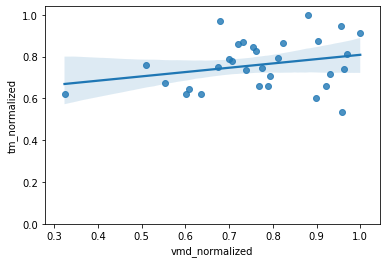

In [179]:
sns.regplot(x="vmd_normalized", y="tm_normalized", data=merge)
plt.ylim(0,)

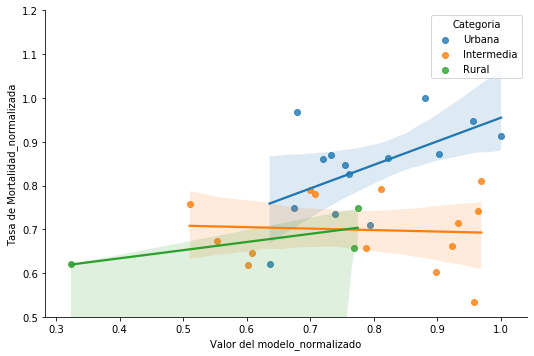

In [147]:
ax=sns.lmplot(x="vmd_normalized", y="tm_normalized", data=merge, hue="Categoria", x_ci=10 , legend_out = False, height=5, aspect=1.5).set(ylim=(0.5, 1.2), xlabel='Valor del modelo_normalizado', ylabel='Tasa de Mortalidad_normalizada')


# 3. Summary

In [49]:
import pandas as pd
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [ ]:
merge = pd.read_csv('datasets/Resultados_corr.csv', sep=';', decimal=",");merge.head()

In [ ]:
urban=merge[merge.Category == 'Urbana']
rural=merge[merge.Category == 'Rural']
intermedia=merge[merge.Category == 'Intermedia']

### Pearson Correlation

In [154]:
pearson_coef, p_value = stats.pearsonr(merge['vmd_normalized'], merge['tm_normalized'])
print("The Pearson Correlation Coefficient for all deparments is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient for all deparments is 0.2721203362704318  with a P-value of P = 0.13861959800894472


In [89]:
pearson_coef, p_value = stats.pearsonr(urban['vmd_normalized'], urban['tm_normalized'])
print("The Pearson Correlation Coefficient for urban deparments is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient for urban deparments is 0.5563229473826735  with a P-value of P = 0.03882496278700704


In [155]:
pearson_coef, p_value = stats.pearsonr(intermedia['vmd_normalized'], intermedia['tm_normalized'])
print("The Pearson Correlation Coefficient for intermedial deparments is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient for intermedial deparments is -0.06628169910815736  with a P-value of P = 0.8218802455867793


In [153]:
pearson_coef, p_value = stats.pearsonr(rural['vmd_normalized'], rural['tm_normalized'])
print("The Pearson Correlation Coefficient for rural deparments is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient for rural deparments is 0.7354763162727772  with a P-value of P = 0.47391689397133485


### Spearman Correlation

In [42]:
correlation, pval = spearmanr(merge[["tasa_mortalidad","valor_modelo"]])
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')

correlation=0.232661, p-value=0.207835


In [43]:
correlation, pval = spearmanr(urban[["tasa_mortalidad","valor_modelo"]])
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')

correlation=0.507692, p-value=0.063839


In [44]:
correlation, pval = spearmanr(intermedia[["tasa_mortalidad","valor_modelo"]])
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')

correlation=0.076923, p-value=0.793806


In [45]:
correlation, pval = spearmanr(rural[["tasa_mortalidad","valor_modelo"]])
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')

correlation=1.000000, p-value=0.000000


### Kendall Correlation

In [52]:
correlation, pval = stats.kendalltau(merge["tasa_mortalidad"],merge["valor_modelo"])
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')

correlation=0.178495, p-value=0.164704


In [53]:
correlation, pval = stats.kendalltau(urban["tasa_mortalidad"],urban["valor_modelo"])
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')

correlation=0.362637, p-value=0.079457


In [55]:
correlation, pval = stats.kendalltau(intermedia["tasa_mortalidad"],intermedia["valor_modelo"])
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')

correlation=0.076923, p-value=0.747189


In [54]:
correlation, pval = stats.kendalltau(rural["tasa_mortalidad"],rural["valor_modelo"])
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')

correlation=1.000000, p-value=0.333333
